In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
w = 10
l = 48
t = np.array([395, 193, 179, 142, 152])
del_pres = np.array([0, 2, 4, 6, 8])
h = np.array([14.1, 9.2, 8.4, 8.1, 7.7])
N = np.array([740, 720, 710, 702, 698])
a = np.array([0, 600, 800, 900, 800])

In [3]:
S = 15.2 * 10**-3
K = 0.02655
motor_eff = 0.75
T = 302
P = 76

In [4]:
# Input to motor (kW)
motor_input = 24 * w/t
motor_input

array([0.60759494, 1.24352332, 1.34078212, 1.69014085, 1.57894737])

In [5]:
# Shaft power (kW)
shaft_power = motor_eff * motor_input
shaft_power

array([0.4556962 , 0.93264249, 1.00558659, 1.26760563, 1.18421053])

In [6]:
# MEP (N/mm^2)
MEP = a/l*S
MEP

array([0.        , 0.19      , 0.25333333, 0.285     , 0.25333333])

In [7]:
# Indicated power (kW)
stroke = 85
D = 70
IP = MEP * stroke * np.pi * 0.25 * D**2 * N *10**-3 / 60000
IP.round(3)

array([0.   , 0.746, 0.981, 1.091, 0.964])

In [8]:
# Free air delivered (m^3/min)
FAD = K * np.sqrt(h) * np.sqrt(T/P)
FAD.round(3)

array([0.199, 0.161, 0.153, 0.151, 0.147])

In [9]:
# Isothermal power (kW)
P1 = 1.013 
r = (del_pres + P1)/P1
print(r)
isothermal_power = P1 * 10**5* FAD * np.log(r)/60000
isothermal_power.round(3)

[1.         2.97433366 4.94866732 6.92300099 8.89733465]


array([0.   , 0.295, 0.414, 0.492, 0.542])

In [10]:
# Mechanical efficiency (%)
eff_mech = IP/shaft_power * 100
eff_mech.round(2)

array([ 0.  , 79.97, 97.52, 86.05, 81.41])

In [11]:
# Isothermal efficiency (%)
eff_isothermal = isothermal_power / IP *100
eff_isothermal[0] = 0
eff_isothermal.round(2)

C:\Users\Drishika\AppData\Local\Temp/ipykernel_5512/1389518160.py:2: RuntimeWarning: invalid value encountered in true_divide
  eff_isothermal = isothermal_power / IP *100


array([ 0.  , 39.61, 42.23, 45.11, 56.22])

In [12]:
# Overall efficiency (%)
eff_overall = isothermal_power /shaft_power * 100
eff_overall.round(2)

array([ 0.  , 31.68, 41.18, 38.82, 45.77])

In [13]:
# Volumetric efficiency (%)
eff_volumetric = FAD * 100 / (stroke * np.pi * 0.25 * D**2 * 10**-9 * N)
eff_volumetric.round(2)

array([82.1 , 68.16, 66.04, 65.59, 64.32])

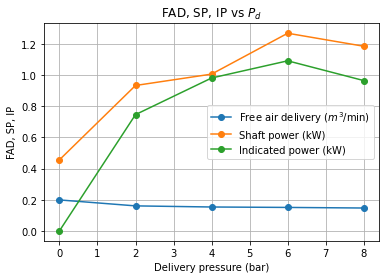

In [14]:
# Plots

plt.plot(del_pres, FAD, marker='o', label = r"Free air delivery ($m^3$/min)")
plt.plot(del_pres, shaft_power, marker='o', label = r"Shaft power (kW)")
plt.plot(del_pres, IP, marker='o', label = r"Indicated power (kW)")
plt.legend()
plt.grid()
plt.title(r"FAD, SP, IP vs $P_d$")
plt.xlabel("Delivery pressure (bar)")
plt.ylabel("FAD, SP, IP")
plt.savefig("Desktop/plot1.png")
plt.show()

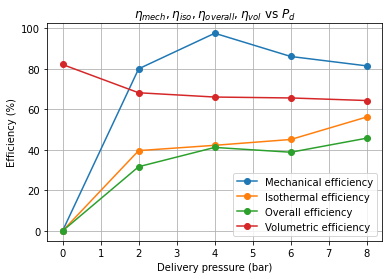

In [15]:
plt.plot(del_pres, eff_mech, marker='o', label = r"Mechanical efficiency")
plt.plot(del_pres, eff_isothermal, marker='o', label = r"Isothermal efficiency")
plt.plot(del_pres, eff_overall, marker='o', label = r"Overall efficiency")
plt.plot(del_pres, eff_volumetric, marker='o', label = r"Volumetric efficiency")
plt.legend()
plt.grid()
plt.title(r"$\eta_{mech}, \eta_{iso}, \eta_{overall}, \eta_{vol}$ vs $P_d$")
plt.xlabel("Delivery pressure (bar)")
plt.ylabel("Efficiency (%)")
plt.savefig("Desktop/plot2.png")
plt.show()